In [41]:
# Load Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #to split the training and testing data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import string
from bs4 import BeautifulSoup 
import re
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# 1) Get the stemmed data using the same process you did in Week 3.

    1) Import the movie review data as a data frame and ensure that the data is loaded properly.

In [2]:
# Read movie data tsv file 
movie_data=pd.read_csv('labeledTrainData.tsv',sep='\t')

In [3]:
movie_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


    2) How many of each positive and negative reviews are there?

In [4]:
movie_data.groupby('sentiment')['sentiment'].count()

sentiment
0    12500
1    12500
Name: sentiment, dtype: int64

   3) Convert all text to lowercase letters.

In [5]:
movie_data['cleaned_review'] = movie_data['review'].str.lower()

    4) Remove punctuation and special characters from the text.

In [6]:
# Removing punctuations

movie_data['cleaned_review'] = movie_data['cleaned_review'].apply(lambda snti: snti.translate(str.maketrans('', '', string.punctuation)))       
                                            

In [7]:
# Display data after removing punctuations
movie_data

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hines...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,it seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...,i dont believe they made this film completely ...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",guy is a loser cant get girls needs to build u...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,this 30 minute documentary buñuel made in the ...


In [8]:
# Remove special characters from the string
pattern = r'[^A-Za-z0-9]+'
movie_data['cleaned_review'] = movie_data['cleaned_review'].apply(lambda snti: re.sub(pattern, " ", snti))  

In [9]:
movie_data

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hines...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,it seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...,i dont believe they made this film completely ...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",guy is a loser cant get girls needs to build u...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,this 30 minute documentary bu uel made in the ...


 3) Remove stop words

In [10]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
stop = stopwords.words('english')
movie_data['cleaned_review'] = movie_data['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [11]:
movie_data.head(5)

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj ive started listening mu...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80s e...


    4) Apply NLTK’s PorterStemmer.

In [12]:
porter_stemmer = PorterStemmer()
movie_data["cleaned_review"] = movie_data["cleaned_review"].str.lower().map(porter_stemmer.stem)

In [13]:
movie_data.head(10)

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj ive started listening mu...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80s e...
5,8196_8,1,I dont know why people think this is such a ba...,dont know people think bad movie got pretty go...
6,7166_2,0,"This movie could have been very good, but come...",movie could good comes way short cheesy specia...
7,10633_1,0,I watched this video at a friend's house. I'm ...,watched video friends house im glad waste mone...
8,319_1,0,"A friend of mine bought this film for £1, and ...",friend mine bought film 1 even grossly overpri...
9,8713_10,1,<br /><br />This movie is full of references. ...,br br movie full references like mad max ii wi...


In [14]:
#Copy all the predictor variables in X dataframe.
X = movie_data[["id","cleaned_review"]]
##since sentiment is the dependent(target) variable so take it in y dataframe
Y = movie_data[["sentiment"]]

In [15]:
X.shape

(25000, 2)

In [16]:
Y.shape

(25000, 1)

In [17]:
#split the data into training and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size= 0.8, test_size=0.2,random_state=10)
#random state can be any number, it will keep the random sample data same irrecpective of multiple runs.

In [18]:
X_train.shape

(20000, 2)

In [19]:
X_test.shape

(5000, 2)

In [20]:
X_test

,id,cleaned_review
18634,8913_9,favorite classic filmed little west philadelph...
1333,2429_8,loved deep cover might like film well many poe...
20315,8470_2,watch lots scary movies least try worst 2nd wo...
6357,4076_1,subject matter deserves much better script fin...
10496,4425_7,another attempt modern japanese directors rede...
...,...,...
9395,8108_3,reading book lot meaning movie didnt give feel...
15688,4446_3,serum starts credits quite reminiscent reanima...
7403,664_2,im particularly fond remakes steal modern jarg...
6369,6988_10,one movie take time get head seen dialogs clos...


# 3) Fit and apply the tf-idf vectorization to the training set.

In [21]:
print ("Creating the bag of words...\n")


# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
count_vectorizer = CountVectorizer() 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. 

train_data_bagofwords = count_vectorizer.fit_transform(X_train["cleaned_review"])

Creating the bag of words...



In [22]:
train_data_bagofwords

<20000x107669 sparse matrix of type '<class 'numpy.int64'>'
	with 2030881 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#Use the TF-IDF class to train the same corpus above
train_data_review = vectorizer.fit_transform(X_train['cleaned_review'])

In [24]:
train_data_review

<20000x107669 sparse matrix of type '<class 'numpy.float64'>'
	with 2030881 stored elements in Compressed Sparse Row format>

# 4) Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [25]:
test_data_bagofwords = count_vectorizer.fit_transform(X_test["cleaned_review"])

In [26]:
test_data_bagofwords.shape

(5000, 52087)

It seems not to make sense to include the test corpus when training the model, since it is not supervised and the size is of test data is alos very small, it is also possible to train it on the whole corpus.

# 5)Train a logistic regression using the training data.


In [27]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train model
model=model.fit(train_data_review, Y_train["sentiment"])
model

LogisticRegression(multi_class='multinomial', random_state=0)

# 6) Find the model accuracy on test set.

In [28]:
# Create the test data reviews
test_data_review = vectorizer.transform(X_test['cleaned_review'])


# Use the logistic regression model to make sentiment label predictions
lr_sentiment = model.predict(test_data_review)

In [29]:
lr_sentiment

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
lr_sentiment.shape

(5000,)

In [31]:
# Copy the results to a pandas dataframe with an "id" column and alr_sentiment "sentiment" column
movie_pred_df = pd.DataFrame(data={"id":X_test["id"],"lr_sentiment":lr_sentiment,"sentiment":Y_test["sentiment"]})
movie_pred_df.head()

,id,lr_sentiment,sentiment
18634,8913_9,1,1
1333,2429_8,1,1
20315,8470_2,0,0
6357,4076_1,0,0
10496,4425_7,1,1


In [32]:
print(f"The percententage of Positive sentiment calculated :",sum(movie_pred_df["lr_sentiment"] > 0))
print(f"The percententage of Negative sentiment calculated :",sum(movie_pred_df["lr_sentiment"] == 0))

The percententage of Positive sentiment calculated : 2570
The percententage of Negative sentiment calculated : 2430


In [33]:
print(f"The percententage of Positive sentiment from raw data:",sum(movie_pred_df["sentiment"] > 0))
print(f"The percententage of Negative sentiment from raw data :",sum(movie_pred_df["sentiment"] == 0))

The percententage of Positive sentiment from raw data: 2512
The percententage of Negative sentiment from raw data : 2488


In [34]:
# Find the positive and negitive percentage of sentiment and logical regression sentiment

vador_accuracy_positive= sum((movie_pred_df['sentiment'] > 0) & (movie_pred_df['lr_sentiment'] > 0))
vador_accuracy_negitive= sum((movie_pred_df['sentiment'] == 0) & (movie_pred_df['lr_sentiment'] == 0))

In [35]:
vador_accuracy_positive

2283

In [36]:
vador_accuracy_negitive

2201

In [37]:
vador_total_reviews = vador_accuracy_positive+vador_accuracy_negitive
vador_total_reviews

4484

4484/5000=0.8968*100 = 89.68%, out of 5000 samples, The percentage of accuracy of the logical regression model is 89.68%, 
so the model we choose is accurate rather than going with the assumption of 50% random prediction.

# 7) Create a confusion matrix for the test set predictions

In [38]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#To create the Confusion Matrix using pandas, we need to apply the pd.crosstab :
confusion_matrix = pd.crosstab(movie_pred_df['sentiment'], movie_pred_df['lr_sentiment'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          2201   287
1           229  2283


# 8) Get the precision, recall, and F1-score for the test set predictions.

Precision Score = TP / (FP + TP) = 2283/(287+2283) = 0.888                                        
Recall Score = TP / (FN + TP) = 2283/(229+2283) = 0.908                                              
F1 Score = 2 * Precision Score * Recall Score/ (Precision Score + Recall Score/)                       
= 2 * 0.888 * 0.908 / (0.888 + 0.908) = 1.612/1.796 = 0.897

# 9) Create a ROC curve for the test set.

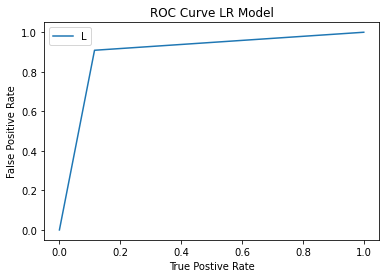

In [39]:
#ROC Curve for Logistic Regression
pred_label = zip([lr_sentiment], "LR")
for y_prediction, lable in pred_label:
    fpr, tpr, _ = roc_curve(Y_test, y_prediction)
    plt.plot(fpr, tpr, label = lable)
#create ROC curve
plt.xlabel("True Postive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve LR Model") 
plt.legend()
plt.show()


# 10)Pick another classification model you learned about this week and repeat steps (5) – (9).#

In [42]:
# Applying MultinomialNaiveBayes for classification 

naive = MultinomialNB()
classifier = naive.fit(train_data_review, Y_train["sentiment"])
predict = classifier.predict(test_data_review)

predict

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

# Repeat step 5

In [43]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train model
model=model.fit(train_data_review, Y_train["sentiment"])
model

LogisticRegression(multi_class='multinomial', random_state=0)

# Repeat step 6

In [44]:
test_data_review1 = vectorizer.transform(X_test['cleaned_review'])

#Find the model accuracy on test set.
# Use the logistic regression model to make sentiment label predictions
lr_sentiment_1 = model.predict(test_data_review)

In [45]:
# Copy the results to a pandas dataframe with an "id" column and alr_sentiment "sentiment" column
movie_pred_df1 = pd.DataFrame(data={"id":X_test["id"],"nv_sentiment":predict,"sentiment":Y_test["sentiment"]})
movie_pred_df1.head()

,id,nv_sentiment,sentiment
18634,8913_9,1,1
1333,2429_8,1,1
20315,8470_2,0,0
6357,4076_1,0,0
10496,4425_7,1,1


In [46]:
print(f"The percententage of Positive sentiment calculated :",sum(movie_pred_df1["nv_sentiment"] > 0))
print(f"The percententage of Negative sentiment calculated :",sum(movie_pred_df1["nv_sentiment"] == 0))

The percententage of Positive sentiment calculated : 2417
The percententage of Negative sentiment calculated : 2583


In [47]:
print(f"The percententage of Positive sentiment from raw data:",sum(movie_pred_df1["sentiment"] > 0))
print(f"The percententage of Negative sentiment from raw data :",sum(movie_pred_df1["sentiment"] == 0))

The percententage of Positive sentiment from raw data: 2512
The percententage of Negative sentiment from raw data : 2488


In [48]:
# Find the positive and negitive percentage of sentiment and logical regression sentiment

vador_accuracy_positive1= sum((movie_pred_df1['sentiment'] > 0) & (movie_pred_df1['nv_sentiment'] > 0))
vador_accuracy_negitive1= sum((movie_pred_df1['sentiment'] == 0) & (movie_pred_df1['nv_sentiment'] == 0))

In [49]:
vador_accuracy_positive1

2136

In [50]:
vador_accuracy_negitive1

2207

In [51]:
vador_total_reviews1 = vador_accuracy_positive1+vador_accuracy_negitive1
vador_total_reviews1

4343

4343/5000=0.8686*100 = 86.86%, out of 5000 samples, The percentage of accuracy of the logical regression model is 86.86%, 
so the model we choose is accurate rather than going with the assumption of 50% random prediction.

# Repeat Step 7

In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#To create the Confusion Matrix using pandas, we need to apply the pd.crosstab :
confusion_matrix = pd.crosstab(movie_pred_df1['sentiment'], movie_pred_df1['nv_sentiment'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          2207   281
1           376  2136


# Repeat Step 8

Precision Score = TP / (FP + TP) = 2136/(281+2136) = 0.883                                        
Recall Score = TP / (FN + TP) = 2136/(376+2136) = 0.850                                              
F1 Score = 2 * Precision Score * Recall Score/ (Precision Score + Recall Score/)                       
= 2 * 0.883 * 0.850 / (0.883 + 0.850) = 1.501/1.733 = 0.866

# Repeat Step 9:

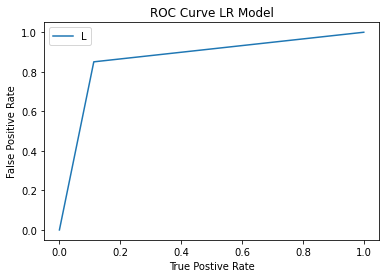

In [54]:
#ROC Curve for Logistic Regression
pred_label = zip([predict], "LR")
for y_prediction, lable in pred_label:
    fpr, tpr, _ = roc_curve(Y_test, y_prediction)
    plt.plot(fpr, tpr, label = lable)
#create ROC curve
plt.xlabel("True Postive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve LR Model") 
plt.legend()
plt.show()
